# Problem Set 4

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

This problem set uses data on insuree characteristics and medical costs. This is a public domain dataset downloaded from [kaggle](https://www.kaggle.com/mirichoi0218/insurance). 

The variables in the data are:
- age: age of primary beneficiary
- sex: insurance contractor gender, female, male
- bmi: Body mass index of primary beneficiary
- children: Number of children covered by health insurance / Number of dependents
- smoker: whether primary beneficiary smokes
- region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.
- charges: medical costs billed by health insurance

You will build a  model to predict charges given the other variables in the data. 


In [132]:
insure = pd.read_csv("https://raw.githubusercontent.com/doctor-phil/ECON323_2024_Spring/main/problem_sets/insurance.csv")
insure.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Questions 1-3

These question are intentionally open-ended. For each one, carefully choose the type of visualization you’ll create. Put some effort into choosing colors, labels, and other formatting.

### Question 1

Create a visualization showing the relationship between smoking and medical costs. 

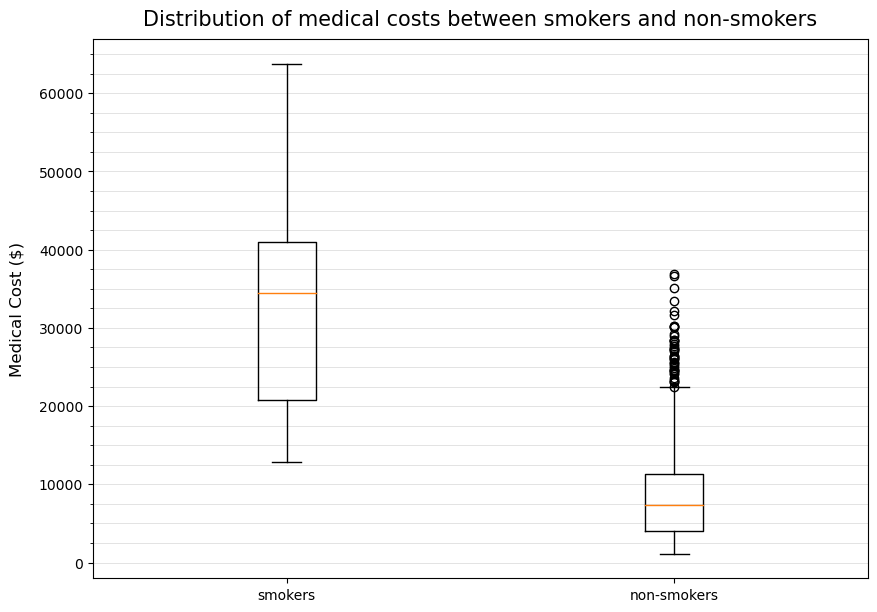

In [147]:
# create visualization between smoking and medical costs
# a box-and-whisker plot between smokers and non-smokers

# create dataset - you need to subset the entire dataframe into smokers and non-smokers
smoker = insure.loc[(insure["smoker"] == "yes")]
non_smoker = insure.loc[(insure["smoker"] == "no")]
q1_df = [smoker["charges"], non_smoker["charges"]]

# create boxplot
fig, ax = plt.subplots()
fig.set_size_inches(10,7)
bp = ax.boxplot(q1_df)

# boxplot title
ax.set_title("Distribution of medical costs between smokers and non-smokers", loc = 'center',
            fontsize = 15, pad = 10)

# axis range and axes title
ax.set_xticklabels(['smokers', 'non-smokers'])

ax.set_ylabel("Medical Cost ($)", fontsize = 12, labelpad = 10)
ax.set_yticks(np.arange(0, 66000, 2500), label = None, minor = True)

ax.grid(which="both", axis = 'y', linewidth = 0.5, alpha = 0.5)

This graph contains two boxplots visualizing the medical cost distribution between smokers and non-smokers respectively.
We see that the mean medical costs is higher among smokers versus non-smokers. Medical costs for smokers seem to cover a larger range than non-smokers. However, the distribution of costs for non-smokers have many more outliers, which makes sense because due to a larger sample size of non-smokers, we would expect a larger variety of patients with different medical needs.

### Question 2

Create a visualization showing the relationship between BMI and medical costs. 

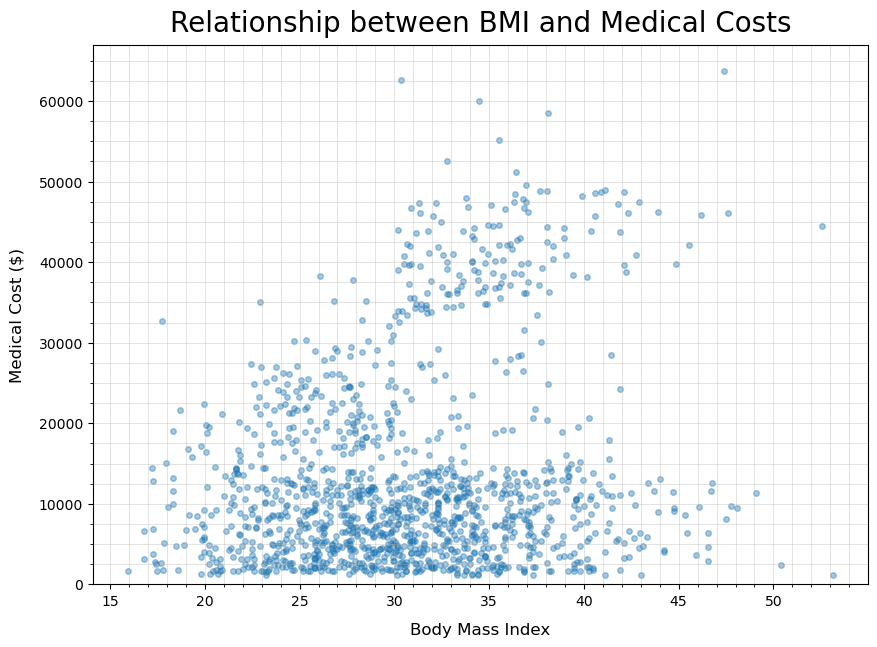

In [148]:
# create a visualization of relationship between BMI and medical costs
# create a scatterplot, BMI on x-axis and medical costs on y-axis

# create figure, create dataset
fig, ax = plt.subplots()
q2_df = pd.DataFrame([insure["bmi"], insure["charges"]]).T

fig.set_size_inches(10,7)
ax.scatter(q2_df["bmi"],q2_df["charges"], s=16, alpha = 0.4)

# add scatterplot title
ax.set_title("Relationship between BMI and Medical Costs", loc = 'center',
            fontsize = 20, pad = 10)

# x-axis
ax.set_xlabel("Body Mass Index", fontsize = 12, labelpad = 10)
ax.set_xticks(np.arange(15, 55, 1), label = None, minor = True)
# ax.set_xlim(xmin = 0)??

# y-axis
ax.set_ylabel("Medical Cost ($)", fontsize = 12, labelpad = 10)
ax.set_yticks(np.arange(0, 66000, 2500), label = None, minor = True)
ax.set_ylim(bottom =0)

# gridlines
ax.grid(which="both", linewidth = 0.5, alpha = 0.5)

The scatterplot showing the relationship between BMI and medical costs hints the likely weak correlation between BMI and medical costs - though an R^2 would serve useful to determine the correlation's strength.

### Question 3

Does the relationship between medical costs and BMI vary with gender? Create a visualization to answer this question.

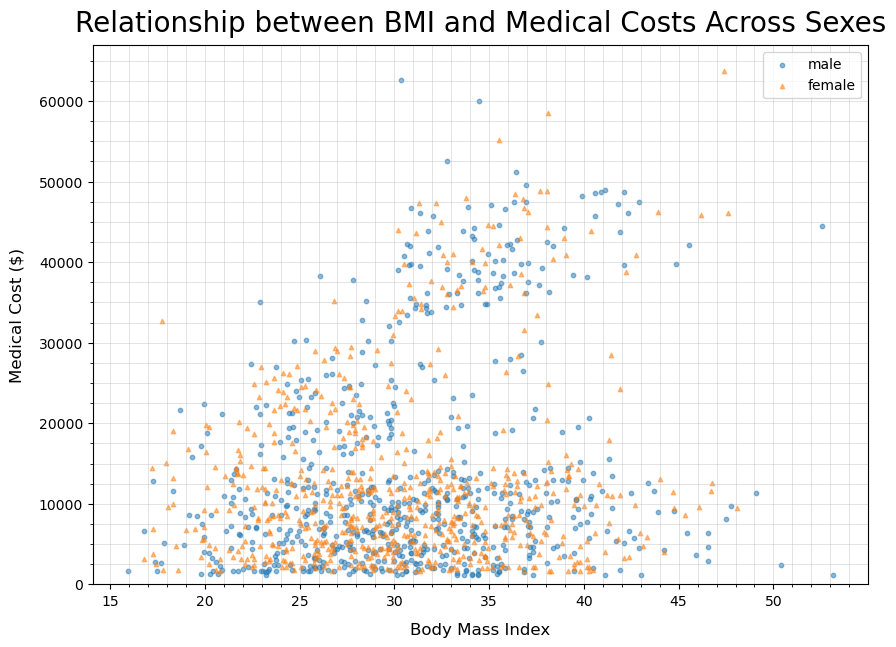

In [149]:
# the same thing as above except we're putting both into the same plot with legends to denote different sexes
# first, subplotting insure dataframe into separate sexes
insure_male = insure.loc[(insure["sex"] == "male")]
insure_female = insure.loc[(insure["sex"] == "female")]
fig, ax = plt.subplots()


# the plot for male patients
fig.set_size_inches(10,7)
ax.scatter(insure_male["bmi"], insure_male["charges"], s=10, alpha = 0.5)
ax.scatter(insure_female["bmi"], insure_female["charges"], s=10, alpha = 0.5, marker = '^')

ax.set_title("Relationship between BMI and Medical Costs Across Sexes", loc = 'center',
            fontsize = 20, pad = 10)
ax.set_xlabel("Body Mass Index", fontsize = 12, labelpad = 10)
ax.set_xticks(np.arange(15, 55, 1), label = None, minor = True)
ax.set_ylabel("Medical Cost ($)", fontsize = 12, labelpad = 10)
ax.set_yticks(np.arange(0, 66000, 2500), label = None, minor = True)
ax.set_ylim(bottom = 0)
ax.grid(which="both", linewidth = 0.5, alpha = 0.5)
label = ["male", "female"]
ax.legend(label)

There seems to be no difference in the relationship between medical costs and BMI across male and female sexes, since the distribution of data points for both male and female patients tend to be similar.

## Questions 4-5

Suppose that you own a mobile app that has a "freemium" pricing policy, and you want to model how the behavior of your users depends on the monthly subscription price that you charge.

The population of your potential app users are distributed between three states; Non-users, Free users, and Premium users. **All users begin as Non-users**; a Non-user will never go directly from being a Non-user to being a Premium user, without first trying the app out as a Free user for at least one month. In each month, 5\% of the Non-users will decide to try the app in the next month.

In every time period, 0.5\% of the Free users tend to leave the app and become Non-users again. After those users switch, some of the remaining users will choose to subscribe to the app in a given month (and transfer from the Free user category to the Premium user category). The probability that a Free user who did not already leave the app chooses to subscribe for the next month depends on the monthly price that you charge. If the monthly price is represented by a positive number $p$, then the probability of subscribing is given by $$\mathbb{P}\left[ \text{Free user chooses to subscribe to Premium}\right] = \frac{1-\mathbb{P}[\text{Free user chooses to leave the app}]}{(1+p)^2}.$$

Finally, every month 5\% of Premium users will cancel their subscriptions, and 1\%  of Premium users will delete the app and become Non-users again.


### Question 4

Define a function `transition_matrix` over prices $p$, whose output is a row-stochastic version of the matrix that describes the transition probabilities in this economy.

Write another function called `iterate` that takes as arguments $p$ and $t$, where $t$ is the number of months and takes a default value of 6 months, and outputs the distribution of users into categories after $t$ months.

In [2]:
# your code here
def transition_matrix(p): #your output should be an numpy array, a matrix that shows transition probabilities
    flow = np.array([[0.95, 0.05, 0], [0.005, (((p**2)+(2*p))/(1+p)**2), 0.995/(1+p)**2], [0.01, 0.05, 0.94]])
    return flow

def iterate(p, t=6):
    start = np.array([1,0,0])
    if t==1:
        output = start.T @ transition_matrix(p)
    else:
        output = start.T @ transition_matrix(p)
        i = 0
        while i <=t:
            i = i+1
            output = output @ transition_matrix(p)
    return output

### Question 5

Create a figure with three subplots arranged horizontally. On each subplot, show the evolution of your distribution of users over the first year of your new app. Each figure should have time $t$ as the x-axis, and the y-axis should track the proportions of users in each category, for a specific price. On these axes, show how the number of users in each category changes over time with a monthly price equal to $p=0.10$, $p=2$, and $p=20$, respectively. Make sure to clearly label your lines, axes, and subplots.

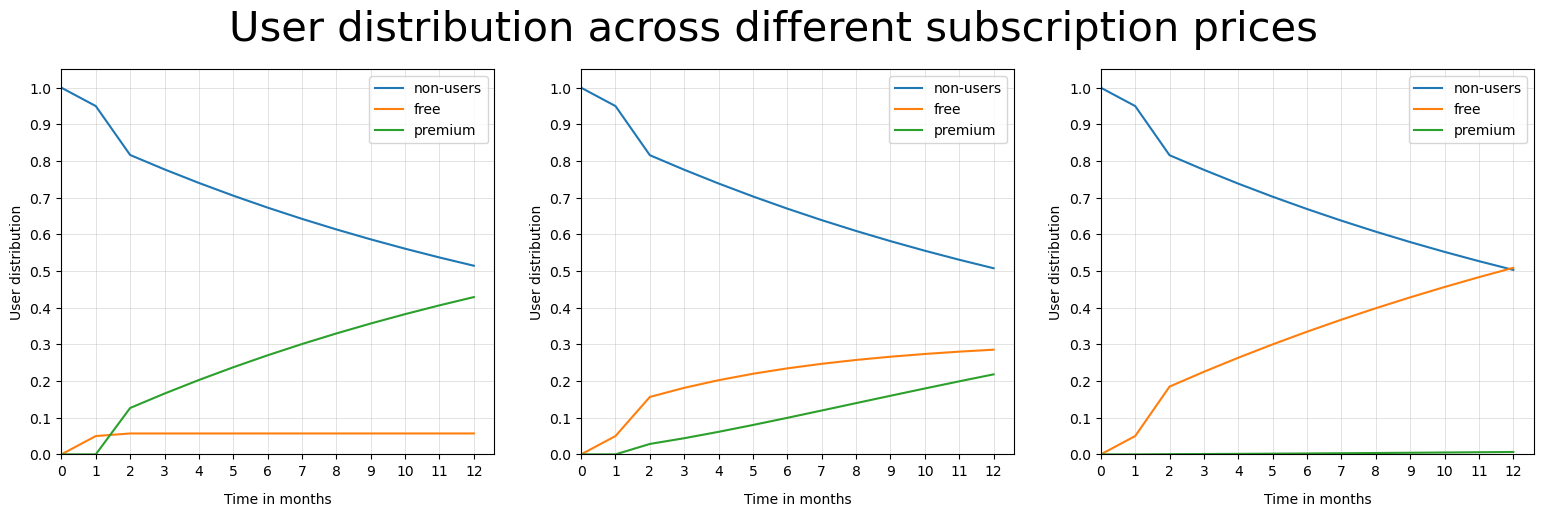

In [131]:
price = [0.1, 2, 20]
x = list(range(0, 13))

fig, ax = plt.subplots(1,3, figsize = (19,5))

obj = {}

for i,p in zip(range(0,3), price):
    obj['y_'+ str(p)] = [np.array([1., 0., 0.])]
    for m in range(1,13):
        obj['y_' + str(p)].append(iterate(p, t=m))
        
fig.suptitle('User distribution across different subscription prices', fontsize=30, y = 1)
label = ["non-users", "free", "premium"]        

for i,p in zip(range(0,3), price):    
    ax[i].plot(x, obj['y_'+str(p)])
    ax[i].set_xlabel("Time in months", fontsize = 10, labelpad = 10)
    ax[i].set_xticks(np.arange(0, 13, 1), label = None)
    ax[i].set_ylabel("User distribution", fontsize = 10)
    ax[i].set_yticks(np.arange(0., 1.1, 0.1), label = None)
    ax[i].legend(label)
    ax[i].set_xlim(left = 0)
    ax[i].set_ylim(bottom = 0)
    ax[i].grid(which="both", linewidth = 0.5, alpha = 0.5)

Which of the above prices yields the most premium users after one year? Is this surprising? Why or why not?

When p = 0.1, the app has the most premium users after one year as opposed to other prices. This is not surprising because p = 0.1 is the cheapest among all the subplots, and therefore there are more users whose willing to pay for a premium subscription.